# Introducción a TensorFlow

In [1]:
import tensorflow as tf

In [2]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [3]:
res = tf.multiply(x1,x2)
print(res)

Tensor("Mul:0", shape=(5,), dtype=int32)


In [4]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [5]:
with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [6]:
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True)

# Aprendizaje neuronal de las señales de tráfico

In [7]:
import os
import skimage.data as imd

In [8]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]
    #print(dirs)
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        file_names = [os.path.join(label_dir,f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
        #print(label_dir)
        #print(file_names)
        for f in file_names:
            images.append(imd.imread(f)) #Nos permite cargar las imagenes
            labels.append(int(d))
    
    return images, labels

In [50]:
main_dir = "/home/jennyesquivel/Documentos/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [10]:
images, labels = load_ml_data(train_data_dir)

In [51]:
len(images)

4575

In [52]:
type(images)

numpy.ndarray

In [53]:
import numpy as np

In [54]:
images = np.array(images)
labels = np.array(labels)

In [55]:
images.size

4575

In [56]:
images[0]

array([[[123, 174, 128],
        [140, 193, 143],
        [145, 196, 137],
        ..., 
        [103, 105,  71],
        [103, 106,  70],
        [104, 108,  71]],

       [[ 97, 149, 120],
        [107, 163, 130],
        [113, 170, 129],
        ..., 
        [106, 107,  63],
        [ 98,  99,  53],
        [ 98,  99,  51]],

       [[ 74, 120, 100],
        [ 80, 130, 107],
        [ 81, 135, 113],
        ..., 
        [107, 107,  62],
        [109, 108,  61],
        [102, 100,  50]],

       ..., 
       [[ 79,  91,  44],
        [ 80,  89,  44],
        [ 85,  91,  51],
        ..., 
        [ 11,  16,   6],
        [ 11,  16,   6],
        [ 11,  16,   6]],

       [[ 82,  95,  48],
        [ 88,  98,  53],
        [ 87,  94,  54],
        ..., 
        [ 13,  17,   8],
        [ 13,  17,   8],
        [ 13,  17,   8]],

       [[ 93, 101,  55],
        [102, 109,  65],
        [105, 110,  72],
        ..., 
        [ 13,  18,   8],
        [ 12,  16,   7],
        [ 10,  15,

In [57]:
labels.ndim

1

In [58]:
labels.size

4575

In [59]:
len(set(labels))

62

In [60]:
images.flags
#Como ha guardado los datos

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [61]:
images.itemsize #En número de bits

8

In [62]:
images.nbytes #Tamaño en bits

36600

In [63]:
images.nbytes/images.itemsize #Conjuntos de 8 bits

4575.0

In [64]:
import matplotlib.pyplot as plt

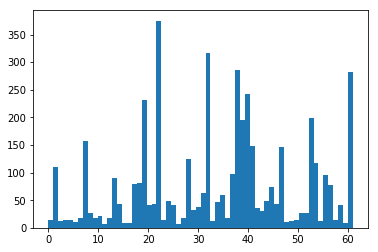

In [65]:
plt.hist(labels, len(set(labels)))
plt.show()
#No hay la misma cantidad de imagenes para todas las señales

In [66]:
import random

In [67]:
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs

[69, 2038, 813, 2829, 2711, 161]

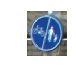

Forma: (81, 71, 3), min:8, max:255


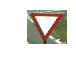

Forma: (84, 99, 3), min:12, max:255


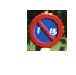

Forma: (71, 69, 3), min:0, max:255


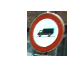

Forma: (94, 82, 3), min:4, max:255


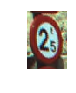

Forma: (68, 46, 3), min:7, max:255


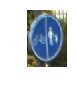

Forma: (86, 60, 3), min:1, max:255


In [68]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma: {0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))
    #El 3 es de los canales RGB

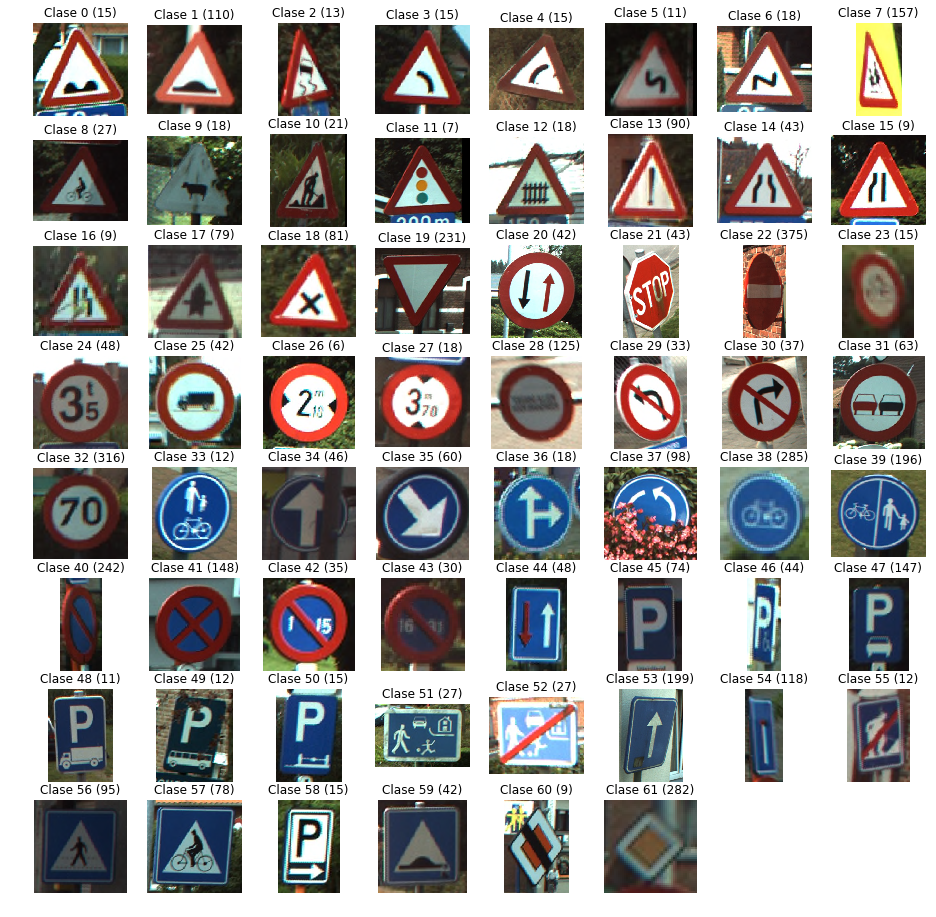

In [69]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label,list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

In [70]:
type(labels)

numpy.ndarray

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

In [71]:
from skimage import transform

In [72]:
w = 9999
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo {0}x{1}".format(h,w))

Tamaño mínimo 22x20


In [75]:
images30 = [transform.resize(image, (30,30),mode='constant') for image in images]

In [76]:
images30[0]

array([[[ 0.36698039,  0.59068954,  0.4790817 ],
        [ 0.70908824,  0.92397059,  0.76429412],
        [ 0.70928105,  0.89834967,  0.53401961],
        ..., 
        [ 0.19312092,  0.18133987,  0.11901961],
        [ 0.36149673,  0.39781373,  0.31454575],
        [ 0.41794118,  0.42144118,  0.25513725]],

       [[ 0.35811765,  0.44151961,  0.41110784],
        [ 0.51019608,  0.59888235,  0.53280392],
        [ 0.70441176,  0.78328431,  0.76235294],
        ..., 
        [ 0.22901961,  0.22303922,  0.16509804],
        [ 0.33344118,  0.35044118,  0.25304902],
        [ 0.32927451,  0.33594118,  0.19681373]],

       [[ 0.99965686,  1.        ,  0.96560458],
        [ 1.        ,  0.99874183,  0.99874183],
        [ 1.        ,  1.        ,  1.        ],
        ..., 
        [ 0.22050654,  0.2245915 ,  0.16944444],
        [ 0.18836601,  0.19586601,  0.10818627],
        [ 0.33993464,  0.365     ,  0.19650327]],

       ..., 
       [[ 0.26370915,  0.34271242,  0.17405229],
        

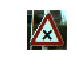

Forma: (30, 30, 3), min:0.004901960784313675, max:1.0


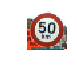

Forma: (30, 30, 3), min:0.006535947712419071, max:1.0


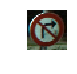

Forma: (30, 30, 3), min:0.0, max:0.9942156862745098


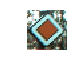

Forma: (30, 30, 3), min:0.053823529411764694, max:1.0


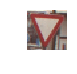

Forma: (30, 30, 3), min:0.17098039215686264, max:0.9680610021786492


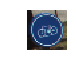

Forma: (30, 30, 3), min:0.04166666666666659, max:0.9542156862745096


In [77]:
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma: {0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [78]:
from skimage.color import rgb2gray

In [79]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

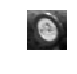

Forma: (30, 30), min:0.09345805490196078, max:0.6451119999999997


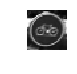

Forma: (30, 30), min:0.057817802941176916, max:0.9731185205882352


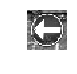

Forma: (30, 30), min:0.04616118398692619, max:1.0


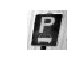

Forma: (30, 30), min:0.10231803921568627, max:0.3057404575163399


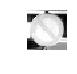

Forma: (30, 30), min:0.16104967647058774, max:0.9999293137254902


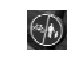

Forma: (30, 30), min:0.11264738888888876, max:0.9850568607843136


In [80]:
rand_signs = random.sample(range(0,len(labels)),6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im,"gray")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("Forma: {0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [81]:
#Vamos a crear un grafo que contendrá las operaciones que 
#quiero ejecutar en la red neuronal
#None porque l inicio están sin asignar
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30]) #Porque nuestras fotos tienen esos datos
y = tf.placeholder(dtype = tf.int32, shape= [None]) #Es de una variable, no es array

#Vamos a construir la red neuronal
#Flatten donde le pasaremos un array con los datos totales
images_flat = tf.contrib.layers.flatten(x) #Distribuir los datos desde matrices a una lista
#Le pasamos las entradas y las salidas
#nn neural network relu para llevar a cabo la clasificación
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

#Función de clasificación a través de regresiones logiśticas
#y con entropías
# Los  logits son las funciones que operaran con todos los valores antes de convertirse en valor de salida
# y que usará una escala relativa para entender las unidades como lineales
#logit porque hace referencia a clasificador logístico

#Medimos la probabilidad de error
#Esto porque cada señal sólo puede tener una sola etiqueta
#Con reduce mean calcula el promedio de todos los elementos en todas las dimensiones del tensor
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits))

#Train optimizer para optimizar
#Ratio de aprendizaje
#Hay otros que usan un gradiente
train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

#Le digo que solo quiero un elemento y el de mayor probabilidad
final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred,tf.float32))

In [82]:
images_flat

<tf.Tensor 'Flatten_1/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [83]:
logits

<tf.Tensor 'fully_connected_1/Relu:0' shape=(?, 62) dtype=float32>

In [84]:
loss

<tf.Tensor 'Mean_2:0' shape=() dtype=float32>

In [85]:
final_pred

<tf.Tensor 'ArgMax_1:0' shape=(?,) dtype=int64>

In [86]:
tf.set_random_seed(1234)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(300):
    #print("EPOCH", i)
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict = {
                                  x:images30,
                                  y:list(labels)
                              })
    _, loss_val = sess.run([train_opt, loss],
                              feed_dict = {
                                  x:images30,
                                  y:list(labels)
                              })
    if i%10 == 0:
        print("EPOCH ",i)
        print("Eficacia: ", accuracy_val)
        print("Perdidas: ",loss_val)
    #print("Fin del epoch",i)

EPOCH  0
Eficacia:  44.1554
Perdidas:  4.01125
EPOCH  10
Eficacia:  35.3639
Perdidas:  3.25199
EPOCH  20
Eficacia:  36.3235
Perdidas:  2.87425
EPOCH  30
Eficacia:  36.5462
Perdidas:  2.64327
EPOCH  40
Eficacia:  36.5499
Perdidas:  2.4937
EPOCH  50
Eficacia:  36.5561
Perdidas:  2.38749
EPOCH  60
Eficacia:  36.5226
Perdidas:  2.30647
EPOCH  70
Eficacia:  36.4778
Perdidas:  2.24136
EPOCH  80
Eficacia:  36.4435
Perdidas:  2.18726
EPOCH  90
Eficacia:  36.4007
Perdidas:  2.14129
EPOCH  100
Eficacia:  36.3519
Perdidas:  2.10153
EPOCH  110
Eficacia:  36.4013
Perdidas:  2.06666
EPOCH  120
Eficacia:  36.3878
Perdidas:  2.03568
EPOCH  130
Eficacia:  36.3311
Perdidas:  2.0079
EPOCH  140
Eficacia:  36.3349
Perdidas:  1.98281
EPOCH  150
Eficacia:  36.3056
Perdidas:  1.96002
EPOCH  160
Eficacia:  36.3071
Perdidas:  1.93921
EPOCH  170
Eficacia:  36.2981
Perdidas:  1.92011
EPOCH  180
Eficacia:  36.226
Perdidas:  1.90249
EPOCH  190
Eficacia:  36.1834
Perdidas:  1.88616
EPOCH  200
Eficacia:  36.1725
Perd

# Evaluación de la red neuronal

In [87]:
sample_idx = random.sample(range(len(images30)),40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [88]:
prediction = sess.run([final_pred],feed_dict={x:sample_images})[0]

In [89]:
prediction

array([47, 39, 40, 32, 32, 31, 19, 40, 32, 22, 22, 46, 40, 56, 32, 32, 45,
       56, 39,  1, 19, 22, 41, 40, 40, 39, 28, 41, 22, 41, 41,  1, 47, 61,
       47, 56, 56, 47, 40,  1])

In [90]:
sample_labels

[47,
 39,
 40,
 32,
 32,
 31,
 19,
 40,
 32,
 22,
 22,
 46,
 40,
 56,
 32,
 54,
 45,
 3,
 38,
 18,
 19,
 22,
 40,
 29,
 36,
 38,
 28,
 41,
 7,
 41,
 38,
 1,
 47,
 61,
 47,
 56,
 56,
 47,
 61,
 10]

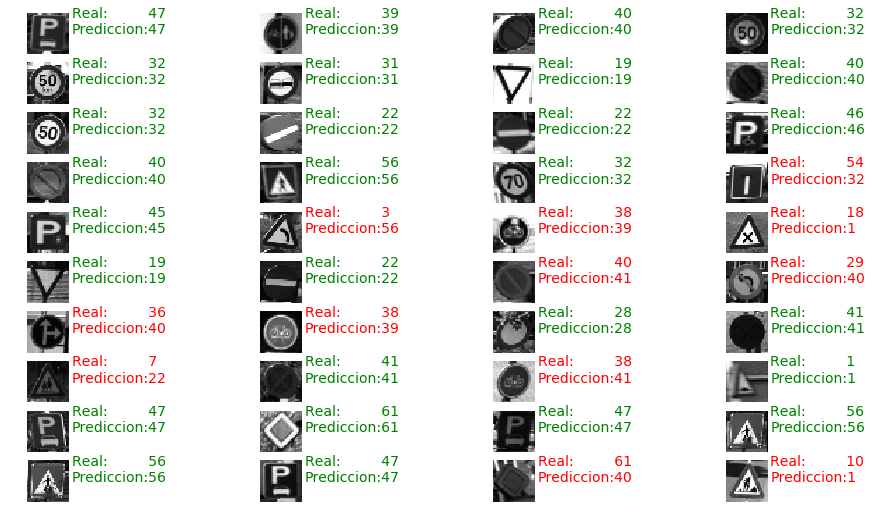

In [91]:
plt.figure(figsize=(16,9))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15,"Real:         {0}\nPrediccion:{1}".format(truth, predi),fontsize=14, color = color)
    plt.imshow(sample_images[i],cmap="gray")
plt.show()